# **Tutorial 3**


## **Imports**

In [2]:
import numpy as np # arrays, array operations
import scipy.stats as stats # statistics
from google.colab import files
import matplotlib.pyplot as plt # plot graphs
import pandas as pd #dataframes
import io
import xarray as xr #multidimensional dataframes


In [ ]:
#installs for reading the google sheets
!pip install --upgrade gspread
!pip install --upgrade oauth2client
!pip install --upgrade gspread google-auth oauth2client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 2.0 MB/s eta 0:00:00
  Attempting uninstall: gspread
    Found existing installation: gspread 6.1.4
    Uninstalling gspread-6.1.4:
      Successfully uninstalled gspread-6.1.4


In [ ]:
#authentication
from google.colab import auth
from google.auth.transport.requests import Request
import gspread
from google.auth import default

# Authenticate the user
auth.authenticate_user()

# Get the credentials
creds, _ = default()

# Authorize gspread with the credentials
gc = gspread.authorize(creds)

In [3]:
#preliz
!pip install preliz

import preliz as pz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.1/519.1 kB 6.7 MB/s eta 0:00:00


(1.6835453160131626, 0.17056802760433848)

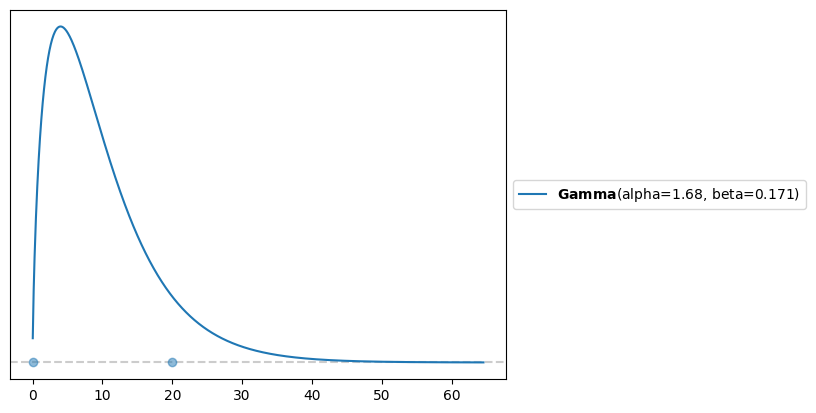

In [6]:
#choose our gamma prior
dist = pz.Gamma()
pz.maxent(dist, 0, 20, 0.9)

#get values of parameters
dist.alpha, dist.beta

plt.savefig("prior.png", bbox_inches='tight')
files.download("prior.png")

### Data Collection

In [ ]:
#reading the responses
# Open the spreadsheet by its ID
spreadsheet_id = '1N5I487HjDrl1Ep76ruVv0MvVpjL1cHRL6BBeHZU_9zg'  # Replace with your own spreadsheet ID
worksheet = gc.open_by_key(spreadsheet_id).sheet1

# Read all records into a DataFrame
data = worksheet.get_all_records()
df = pd.DataFrame(data)

# Display the DataFrame
df.head()

,Timestamp,How many emails do you receive each day?
0,3/9/2025 15:19:25,6
1,3/9/2025 15:20:07,4
2,3/9/2025 15:20:17,3


In [9]:
#simulate data
data = np.random.poisson(8, 24)
print(data)

n = len(data)
print(f'There are {n} participants')

S = np.sum(data)
print(f'There are a total of {S} emails')

[ 7  7 12  8 11  7  7 12  9 13  6  4 11 13  7 14 10  8  6  7  8  4  7  5]
There are 24 participants
There are a total of 203 emails


Likelihood parameters

In [8]:
data = df['How many emails do you receive each day?'].to_numpy()
print(data)

n = len(data)
print(f'There are {n} participants')

S = np.sum(data)
print(f'There are a total of {S} emails')

NameError: name 'df' is not defined

Posterior

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8]),
 [Text(0, -0.1, '−0.1'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.20000000000000004, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5000000000000001, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8')])

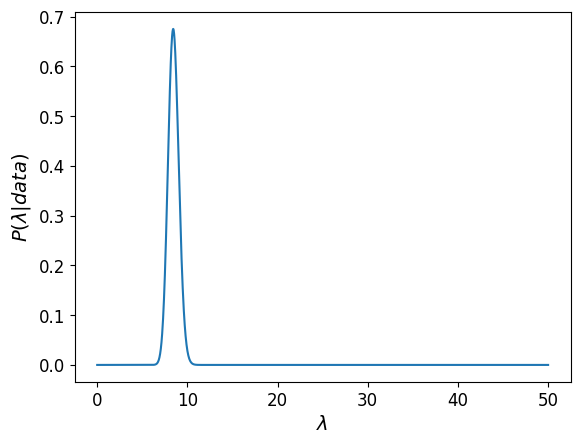

In [10]:
#all in one update
x = np.linspace(0, 50, 2000)
𝛼_prior = dist.alpha
𝛽_prior = dist.beta

posterior = pz.Gamma(𝛼_prior + S, 𝛽_prior + n).pdf(x)

plt.plot(x, posterior)
plt.xlabel('$\\lambda$', fontsize = 14)
plt.ylabel('$P(\\lambda|data)$', fontsize = 14)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig("posterior1.png", bbox_inches='tight')
files.download("posterior1.png")

7
14
26
34
45
52
59
71
80
93
99
103
114
127
134
148
158
166
172
179
187
191
198
203


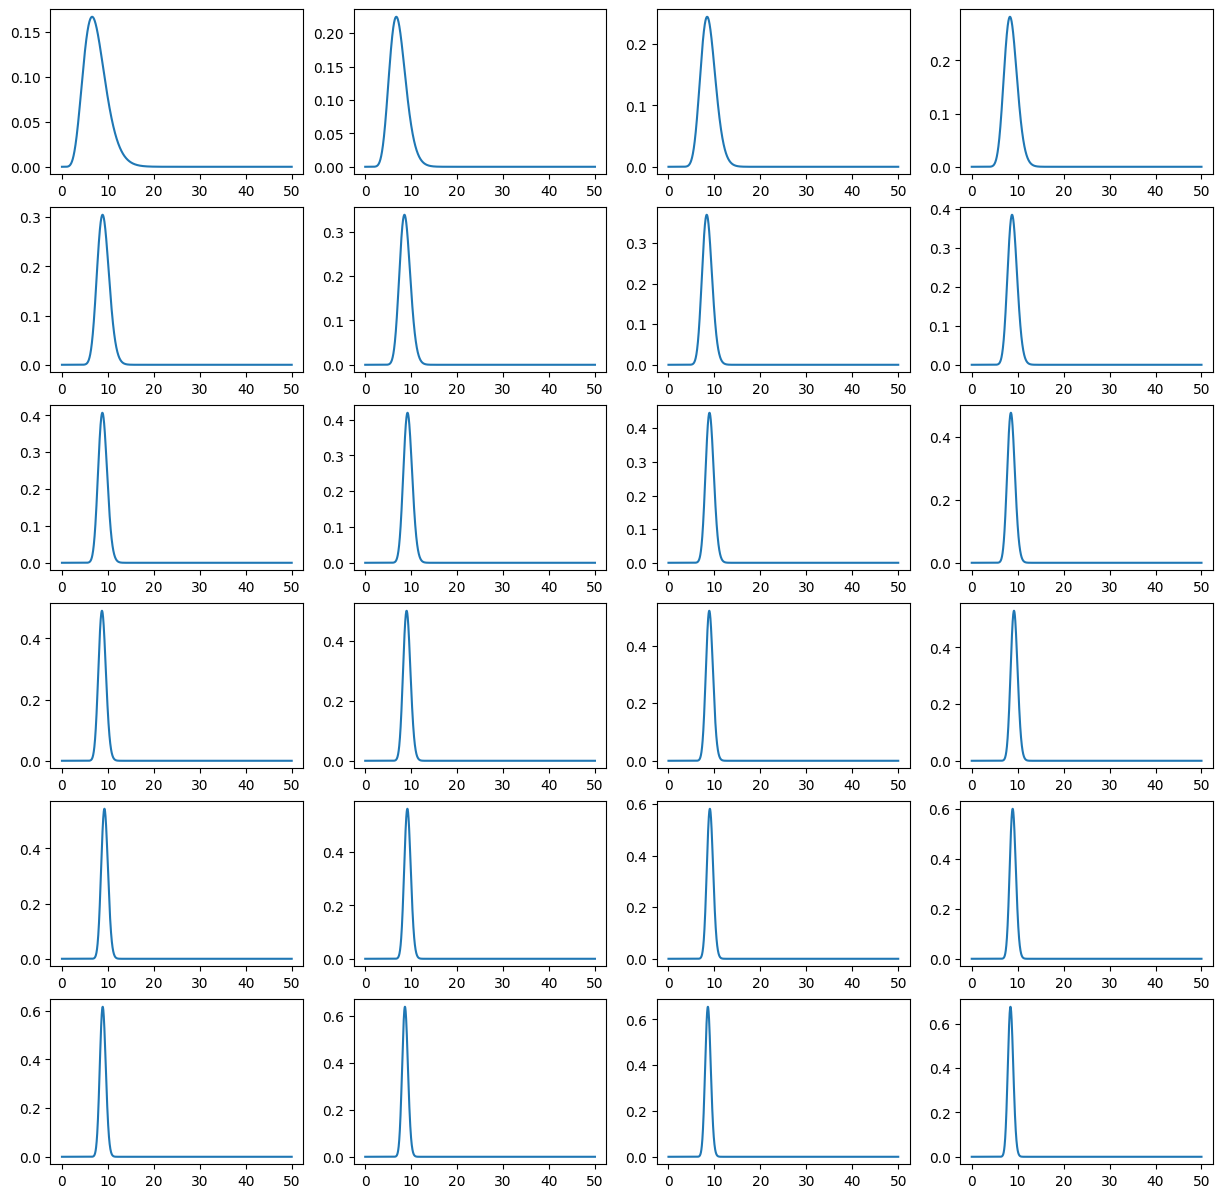

In [11]:
#sequential update
plt.figure(figsize=(15, 15))
for idx in range(len(data)):
  S = np.sum(data[0:idx + 1])
  print(S)
  posterior = pz.Gamma(𝛼_prior + S, 𝛽_prior + idx + 1).pdf(x)
  plt.subplot(6, 4, idx + 1)
  plt.plot(x, posterior)

plt.savefig("posterior2.png", bbox_inches='tight')
files.download("posterior2.png")

Effect of Prior

In [15]:
#choose our gamma prior

dist1 = pz.Gamma()
pz.maxent(dist1, 0, 60, 0.9)

dist2 = pz.Gamma()
pz.maxent(dist2, 0, 20, 0.9)

dist3 = pz.Gamma()
pz.maxent(dist3, 30, 60, 0.9)

plt.savefig("priors.png", bbox_inches='tight')
files.download("priors.png")

priors = [(dist1.alpha, dist1.beta), (dist2.alpha, dist2.beta), (dist3.alpha, dist3.beta)]


[(1.6835717174070346, 0.05685668644131376),
 (1.6835453160131626, 0.17056802760433848),
 (23.83811718140582, 0.5276961890871039)]

7
14
26
34
45
52
59
71
80
93
99
103
114
127
134
148
158
166
172
179
187
191
198
203


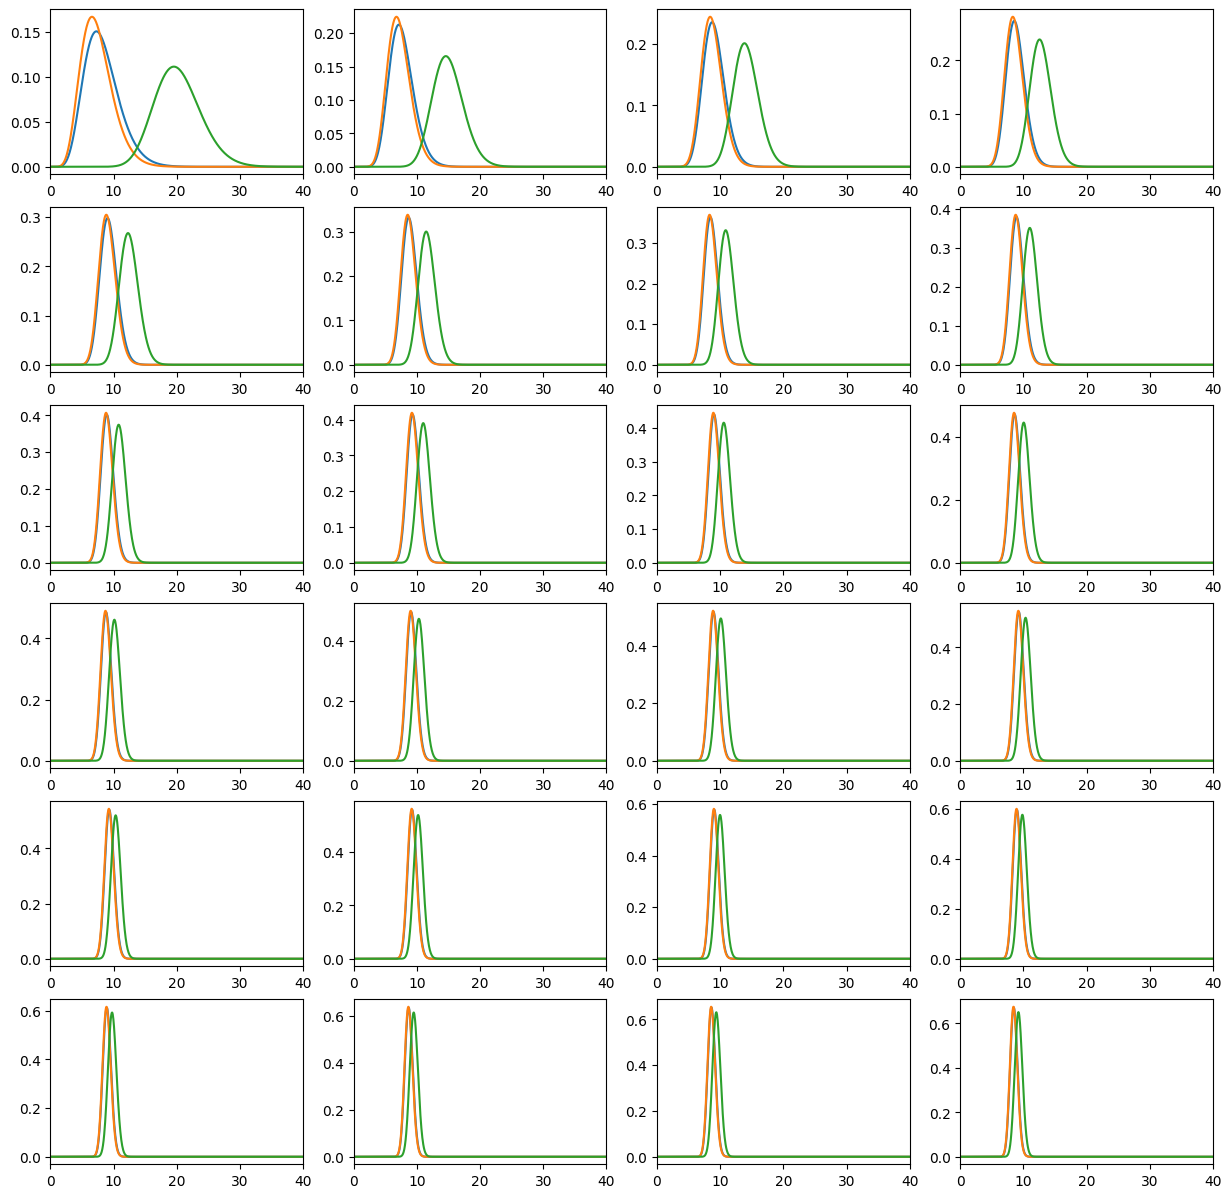

In [16]:
# sequential with different priors
x = np.linspace(0, 100, 2000)

plt.figure(figsize=(15, 15))
for idx in range(len(data)):
  S = np.sum(data[0:idx + 1])
  print(S)
  plt.subplot(6, 4, idx + 1)
  for (𝛼_prior, 𝛽_prior) in priors:
    posterior = pz.Gamma(𝛼_prior + S, 𝛽_prior + idx + 1).pdf(x)
    plt.plot(x, posterior)
    plt.xlim([0, 40])


plt.savefig("posterior3.png", bbox_inches='tight')
files.download("posterior3.png")

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8]),
 [Text(0, -0.1, '−0.1'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.20000000000000004, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5000000000000001, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8')])

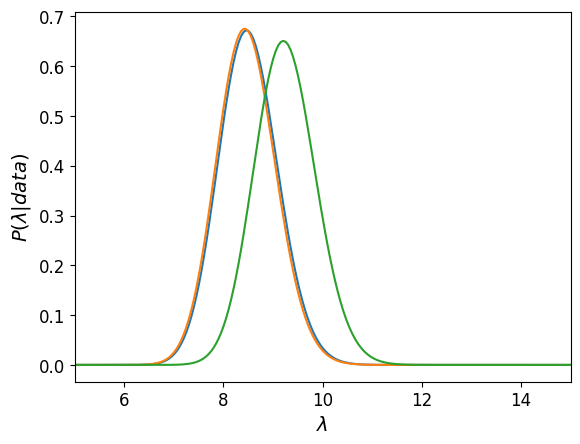

In [17]:
#final update only
n = len(data)
S = np.sum(data)

for (𝛼_prior, 𝛽_prior) in priors:
    posterior = pz.Gamma(𝛼_prior + S, 𝛽_prior + n).pdf(x)
    plt.plot(x, posterior)
    plt.xlim([5, 15])

plt.xlabel('$\\lambda$', fontsize = 14)
plt.ylabel('$P(\\lambda|data)$', fontsize = 14)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig("posterior4.png", bbox_inches='tight')
files.download("posterior4.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

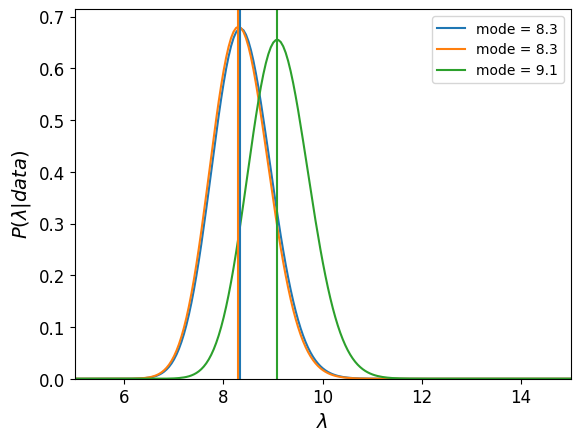

In [ ]:
#modes
n = len(data)
S = np.sum(data)
modes = np.zeros((3, 1))
colors = []
for i, (𝛼_prior, 𝛽_prior) in enumerate(priors):
  posterior = pz.Gamma(𝛼_prior + S, 𝛽_prior + n).pdf(x)
  line, = plt.plot(x, posterior)
  modes[i] = pz.Gamma(𝛼_prior + S, 𝛽_prior + n).mode()
  c = line.get_color()
  colors.append(c)
  plt.xlim([5, 15])

ylim = plt.gca().get_ylim()
for i in range(3):
  plt.plot([modes[i], modes[i]], ylim, color = colors[i], label = f'mode = {np.round(modes[i], 1)[0]}')

plt.xlabel('$\\lambda$', fontsize = 14)
plt.ylabel('$P(\\lambda|data)$', fontsize = 14)
plt.ylim([0, ylim[1]])
plt.legend(loc = 'upper right')


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig("modes.png", bbox_inches='tight')
files.download("modes.png")

Interactive plotting

In [18]:
pz.Gamma(mu=2, sigma=1).plot_interactive()


interactive(children=(FloatSlider(value=2.0, description='mu (0, inf)', max=12.0, min=2.220446049250313e-16, s…